In [14]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
#get mnist data from local file
def get_mnist_data():
    mnist_file_path = pathlib.Path("data\mnist.npz")
    with np.load(mnist_file_path) as f:
        images, labels = f["x_train"], f["y_train"]
    images = images.astype("float32") / 255.0
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = np.eye(10)[labels]
    return images, labels

In [16]:
def ReLU(x):
    return np.maximum(0, x)

def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def forward_propagation(w1, b1, w2, b2, X):
    z1 = np.dot(w1, X) + b1
    a1 = ReLU(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def back_propagation(z1, a1, w2, a2, X, y):
    dz2 = 2 * (a2 - y)
    dw2 = np.dot(dz2, a1.T)# / X.shape[1]    it's all about the gradient, if we set the learning rate small enough, we don't need to divide by the number of samples
    db2 = np.sum(dz2, axis=1, keepdims=True)# / X.shape[1] 
    dz1 = np.dot(w2.T, dz2) * (z1 > 0) 
    dw1 = np.dot(dz1, X.T)# / X.shape[1] 
    db1 = np.sum(dz1, axis=1, keepdims=True)# / X.shape[1] 
    return dw1, db1, dw2, db2

def update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    w1 -= learning_rate * dw1
    b1 -= learning_rate * np.reshape(db1, (db1.shape[0], 1))
    w2 -= learning_rate * dw2
    b2 -= learning_rate * np.reshape(db2, (db2.shape[0], 1))
    return w1, b1, w2, b2

def get_predictions(a2):
    return np.argmax(a2, axis=0)

def get_accuracy(predictions, y):
    return  np.sum(predictions == y) / y.shape[0]


In [17]:
#get data from mnist dataset
images, labels = get_mnist_data()
m, n = images.shape
images.shape, labels.shape

((60000, 784), (60000, 10))

In [18]:
# MAIN

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

#change dimension of the data
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

#Train the model
node_num = 10
learning_rate = 0.000003
epochs = 500
#He initialization
w1 = np.random.randn(node_num, 784) * np.sqrt(2/784)
b1 = np.zeros((node_num, 1))
w2 = np.random.randn(10, node_num) * np.sqrt(2/node_num)
b2 = np.zeros((10, 1))

for epoch in range(epochs):
    z1, a1, z2, a2 = forward_propagation(w1, b1, w2, b2, X_train)
    dw1, db1, dw2, db2 = back_propagation(z1, a1, w2, a2, X_train, y_train)
    w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate)
    if (epoch % 10 == 0):
        print ("Epoch: ", epoch)
        print ("Accuracy: ", get_accuracy(get_predictions(a2), get_predictions(y_train)))
    


Epoch:  0
Accuracy:  0.10905555555555556
Epoch:  10
Accuracy:  0.5479444444444445
Epoch:  20
Accuracy:  0.7316111111111111
Epoch:  30
Accuracy:  0.7347592592592592
Epoch:  40
Accuracy:  0.8047407407407408
Epoch:  50
Accuracy:  0.8295370370370371
Epoch:  60
Accuracy:  0.8402407407407407
Epoch:  70
Accuracy:  0.8584259259259259
Epoch:  80
Accuracy:  0.8719629629629629
Epoch:  90
Accuracy:  0.8797407407407407
Epoch:  100
Accuracy:  0.8847407407407407
Epoch:  110
Accuracy:  0.8885740740740741
Epoch:  120
Accuracy:  0.8917777777777778
Epoch:  130
Accuracy:  0.8937962962962963
Epoch:  140
Accuracy:  0.8951296296296296
Epoch:  150
Accuracy:  0.896
Epoch:  160
Accuracy:  0.8970370370370371
Epoch:  170
Accuracy:  0.8991111111111111
Epoch:  180
Accuracy:  0.9012592592592592
Epoch:  190
Accuracy:  0.9033148148148148
Epoch:  200
Accuracy:  0.9045740740740741
Epoch:  210
Accuracy:  0.9057962962962963
Epoch:  220
Accuracy:  0.9068333333333334
Epoch:  230
Accuracy:  0.9079444444444444
Epoch:  240
Acc

In [19]:
z1, a1, z2, a2 = forward_propagation(w1, b1, w2, b2, X_test)
print ("Accuracy: ", get_accuracy(get_predictions(a2), get_predictions(y_test)) * 100, "%")



Accuracy:  91.83333333333333 %


Prediction:  7
Label:  7


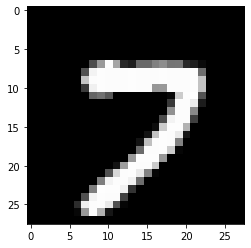

In [32]:
index = 207
vect_X = X_test[:, index,None]
prediction = get_predictions(a2)
label = get_predictions(y_test[:, index])
print("Prediction: ", prediction[index])
print("Label: ", label)

current_image = vect_X.reshape((28, 28)) * 255.0

plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()
